# Alpine Ibex Agent-Based Model

### Activate virtual environment and install requirements:
pip install -r requirements.txt

In [1]:
# Generate and visualize terrian.npy for Alpine Ibex Agent-based Model
from pathlib import Path
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

In [5]:
# Create random terrain data
np.random.seed(42)
terrain = np.random.rand(100,100)

In [6]:
# Smooth it with Gaussian filter (simulating gentle slopes)
terrain = gaussian_filter(terrain, sigma=3)

In [7]:
# Normalize values to [0, 1]
terrain = (terrain - terrain.min()) / (terrain.max() - terrain.min())

In [11]:
# Save to data/terrain.npy
project_root = Path(".").resolve().parent
data_dir = project_root / "data"
data_dir.mkdir(exist_ok=True)
np.save(data_dir / "terrain.npy", terrain)

print(f"Terrain file saved to: {data_dir / 'terrain.npy'}")

Terrain file saved to: D:\EdgeDownload\CITS4403\Alpine_Ibex_Model\data\terrain.npy


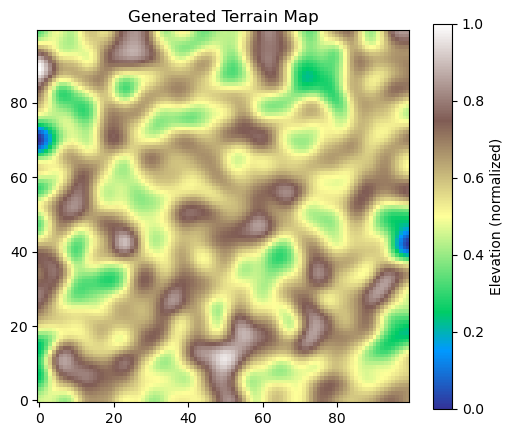

In [12]:
# Visualize terrain
plt.figure(figsize=(6, 5))
plt.imshow(terrain, cmap="terrain", origin="lower")
plt.colorbar(label="Elevation (normalized)")
plt.title("Generated Terrain Map")
plt.show()

In [17]:
# Setup imports and environment
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set project root automatically
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
print('Project root:', project_root)
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import our modules
from src.experiments import run_scenario
from src.environment import project_paths
# Set project root automatically
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
print('Project root:', project_root)
# Ensure data and figures directories exist
data_dir, figures_dir, _ = project_paths(project_root)
print('Data dir:', data_dir)
print('Figures dir:', figures_dir)

Project root: d:\EdgeDownload\CITS4403\Alpine_Ibex_Model
Project root: d:\EdgeDownload\CITS4403\Alpine_Ibex_Model
Data dir: d:\EdgeDownload\CITS4403\Alpine_Ibex_Model\data
Figures dir: d:\EdgeDownload\CITS4403\Alpine_Ibex_Model\figures



===== Running baseline scenario =====
[baseline] saved to d:\EdgeDownload\CITS4403\Alpine_Ibex_Model\data\results_baseline.csv


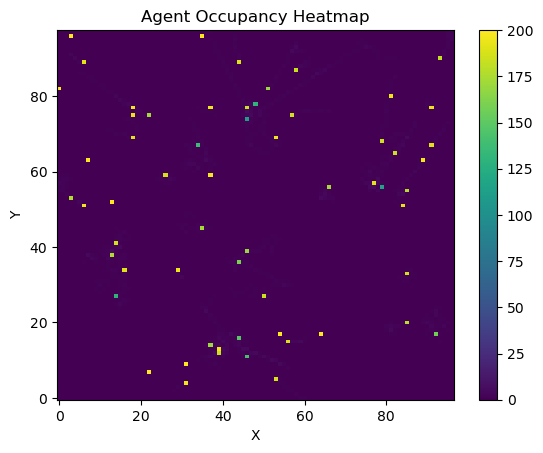

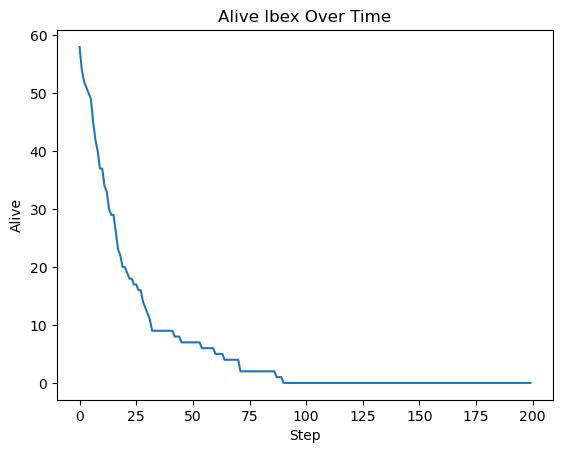

[baseline] figures saved to d:\EdgeDownload\CITS4403\Alpine_Ibex_Model\figures\heatmap_baseline.png and d:\EdgeDownload\CITS4403\Alpine_Ibex_Model\figures\pop_baseline.png
Finished baseline: 12000 records

===== Running low_salt scenario =====
[low_salt] saved to d:\EdgeDownload\CITS4403\Alpine_Ibex_Model\data\results_low_salt.csv


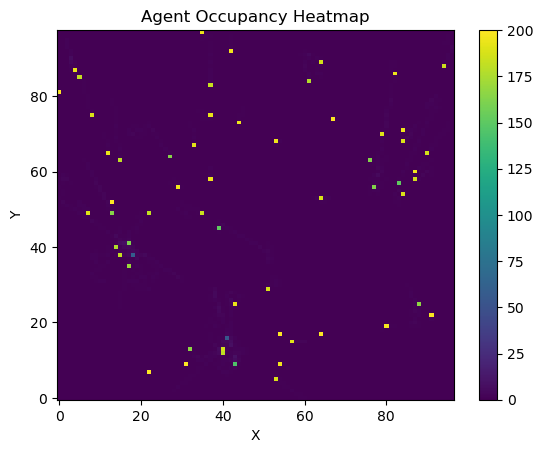

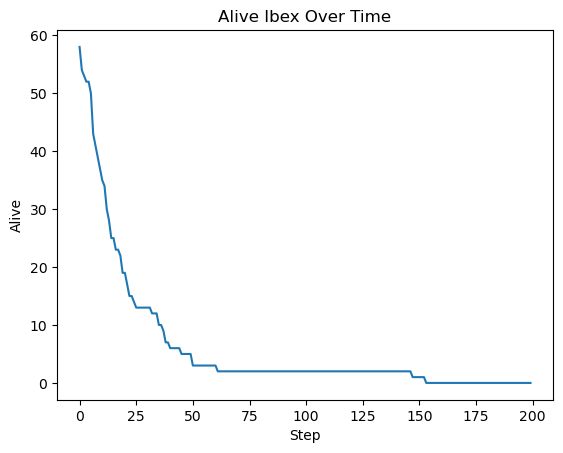

[low_salt] figures saved to d:\EdgeDownload\CITS4403\Alpine_Ibex_Model\figures\heatmap_low_salt.png and d:\EdgeDownload\CITS4403\Alpine_Ibex_Model\figures\pop_low_salt.png
Finished low_salt: 12000 records

===== Running steeper scenario =====
[steeper] saved to d:\EdgeDownload\CITS4403\Alpine_Ibex_Model\data\results_steeper.csv


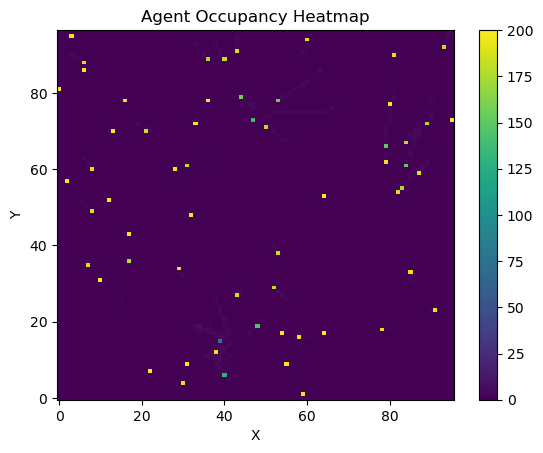

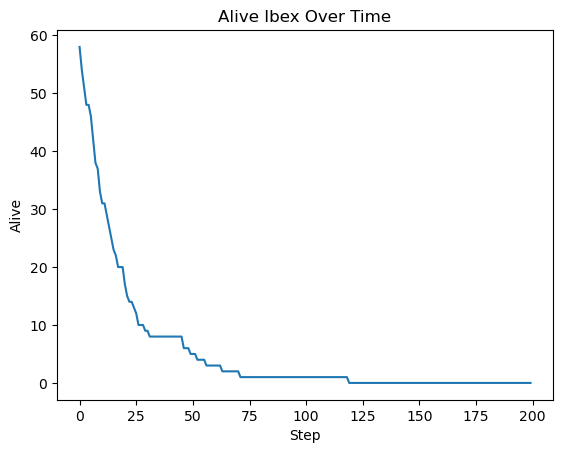

[steeper] figures saved to d:\EdgeDownload\CITS4403\Alpine_Ibex_Model\figures\heatmap_steeper.png and d:\EdgeDownload\CITS4403\Alpine_Ibex_Model\figures\pop_steeper.png
Finished steeper: 12000 records


In [18]:
# Run all scenarios
scenarios = [
    ('baseline', 1.0, 1.0),
    ('low_salt', 0.5, 1.0),
    ('steeper', 1.0, 1.3),
]

results = {}
for name, salt_mod, slope_mod in scenarios:
    print(f'\n===== Running {name} scenario =====')
    df = run_scenario(project_root, name, salt_modifier=salt_mod, slope_modifier=slope_mod)
    results[name] = df
    print(f'Finished {name}: {len(df)} records')


### BASELINE ###


,step,id,x,y,energy,salt_need,alive
0,0,0,37.467008,93.334720,0.888134,0.449463,1
1,0,1,6.358583,85.308560,0.835453,0.493229,1
2,0,2,81.319697,20.699686,0.667320,0.283362,1
3,0,3,41.933852,29.552145,0.839062,0.265798,1
4,0,4,45.516249,76.995007,0.675064,0.415694,1


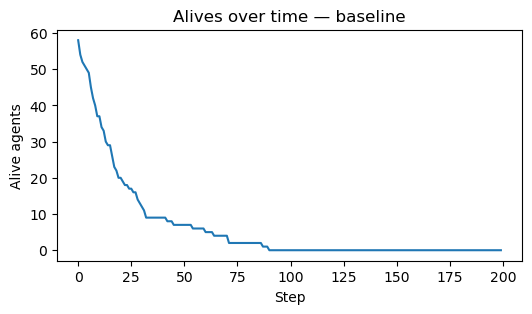


### LOW_SALT ###


,step,id,x,y,energy,salt_need,alive
0,0,0,37.096959,93.244549,0.888134,0.449463,1
1,0,1,5.948935,85.025690,0.835453,0.493229,1
2,0,2,81.319697,20.699686,0.667320,0.283362,1
3,0,3,41.933852,29.552145,0.839062,0.265798,1
4,0,4,44.958490,76.932292,0.675064,0.415694,1


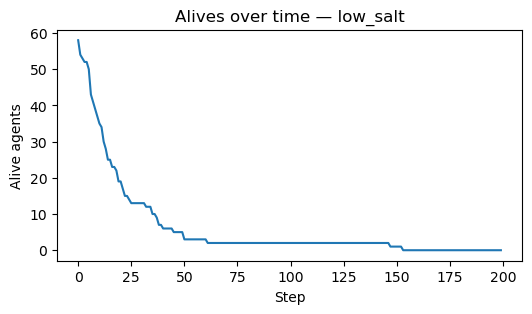


### STEEPER ###


,step,id,x,y,energy,salt_need,alive
0,0,0,37.276710,93.720681,0.886987,0.449463,1
1,0,1,5.992808,85.574863,0.834077,0.493229,1
2,0,2,81.558908,20.770189,0.665658,0.283362,1
3,0,3,42.143133,29.370199,0.837213,0.265798,1
4,0,4,45.308864,77.413621,0.673818,0.415694,1


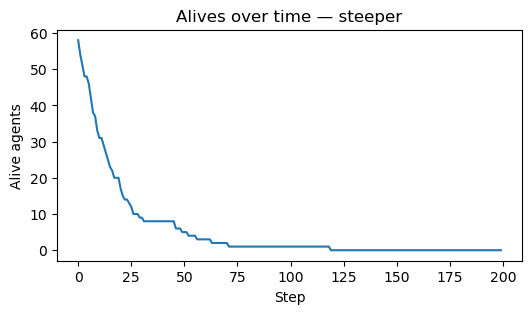

In [19]:
# Display summary of results
for name, df in results.items():    
    print(f'\n### {name.upper()} ###')
    display(df.head())
    alive_counts = df.groupby('step')['alive'].sum()
    plt.figure(figsize=(6,3))
    plt.plot(alive_counts)
    plt.title(f'Alives over time — {name}')
    plt.xlabel('Step')
    plt.ylabel('Alive agents')
    plt.show()